In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# Tratamento de Dados

In [2]:
data_raw=pd.read_csv("/kaggle/input/big-five-personality-test/IPIP-FFM-data-8Nov2018/data-final.csv",sep='\t')
data_raw.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
data_raw.drop(data_raw.columns[50:107], axis=1, inplace = True)
data_raw.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE,1.0,38.0


In [4]:
data_raw.isnull().values.sum()

89227

## Temos dados faltantes, qual a porcentagem deles?

In [5]:
print(f'{(data_raw.isnull().values.sum()/len(data_raw)):.2f}% dos dados são faltantes.')

0.09% dos dados são faltantes.


## Como a porcentagem de dados faltantes é muito baixa, podemos eliminá-los do dataset sem maiores problemas.

In [6]:
data_raw.dropna(inplace=True)
data = data_raw.copy()

## Agora, vamos visualizar os dados. Para isso, vamos relacionar cada coluna à respectiva pergunta do teste de personalidade. Em seguida, vamos avaliar as respostas para as perguntas.

In [7]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Nome dos grupos e colunas
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [8]:
def plot_hist(group,questions,color):
    plt.figure(figsize=(15,40))
    for i in range(0,10):
        plt.subplot(10,3,i+1)
        plt.hist(data[group[i]],bins=20, color= color, alpha=.5)
        plt.title(questions[group[i]])

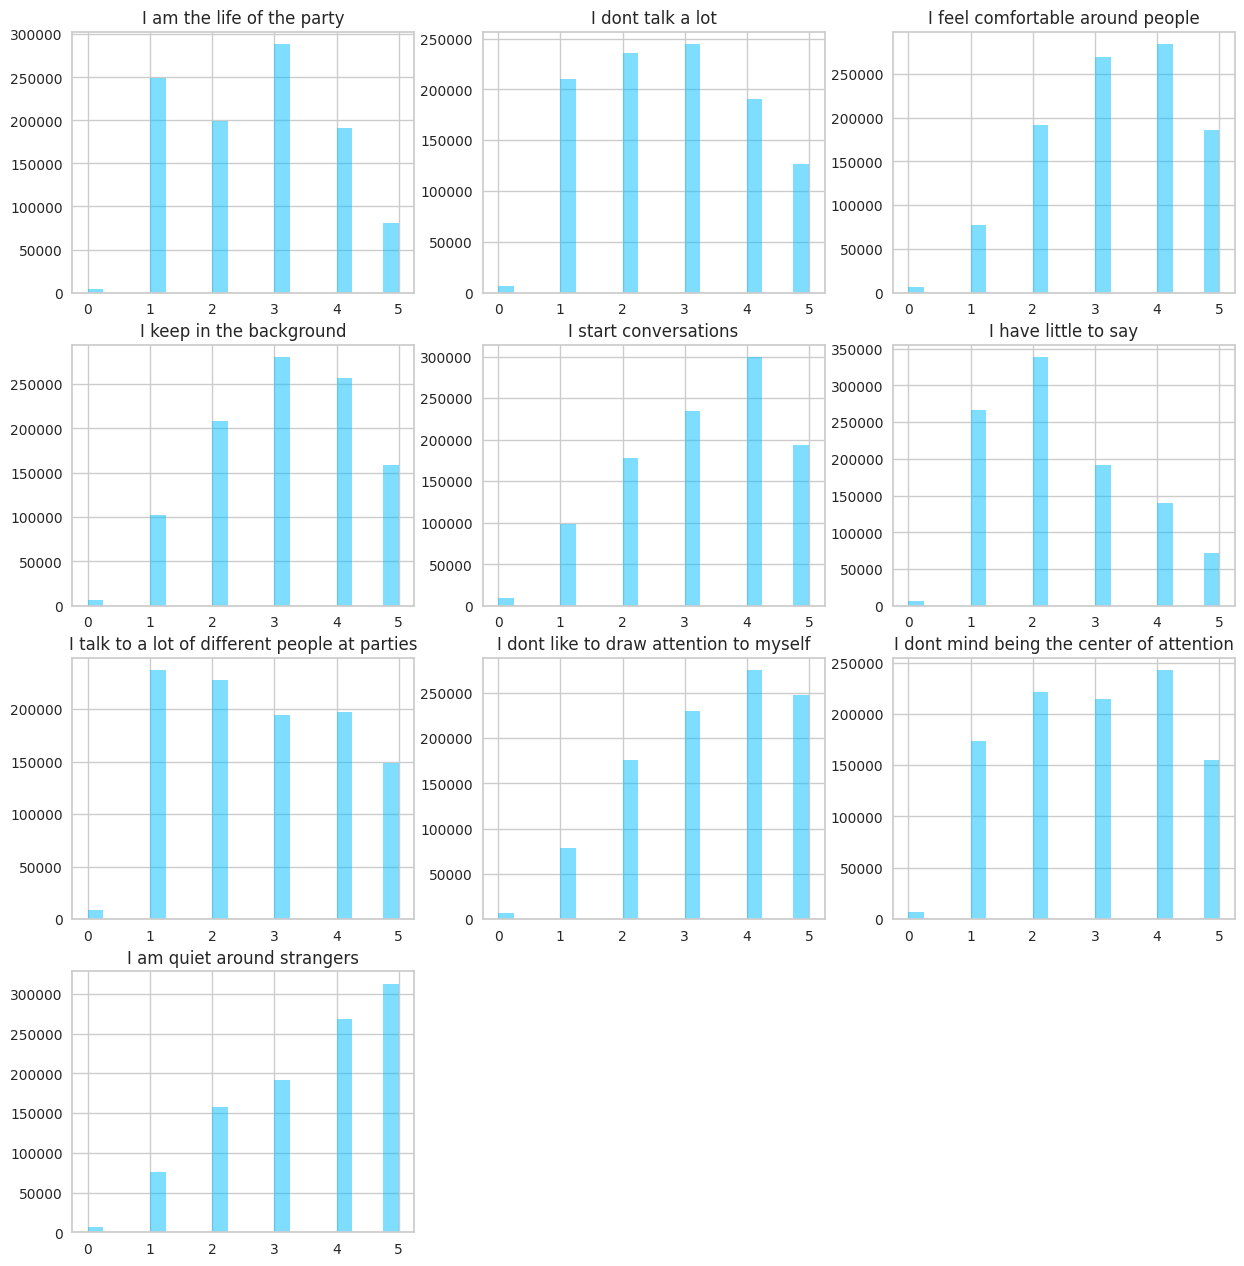

In [9]:
plot_hist(EXT,ext_questions,'deepskyblue')

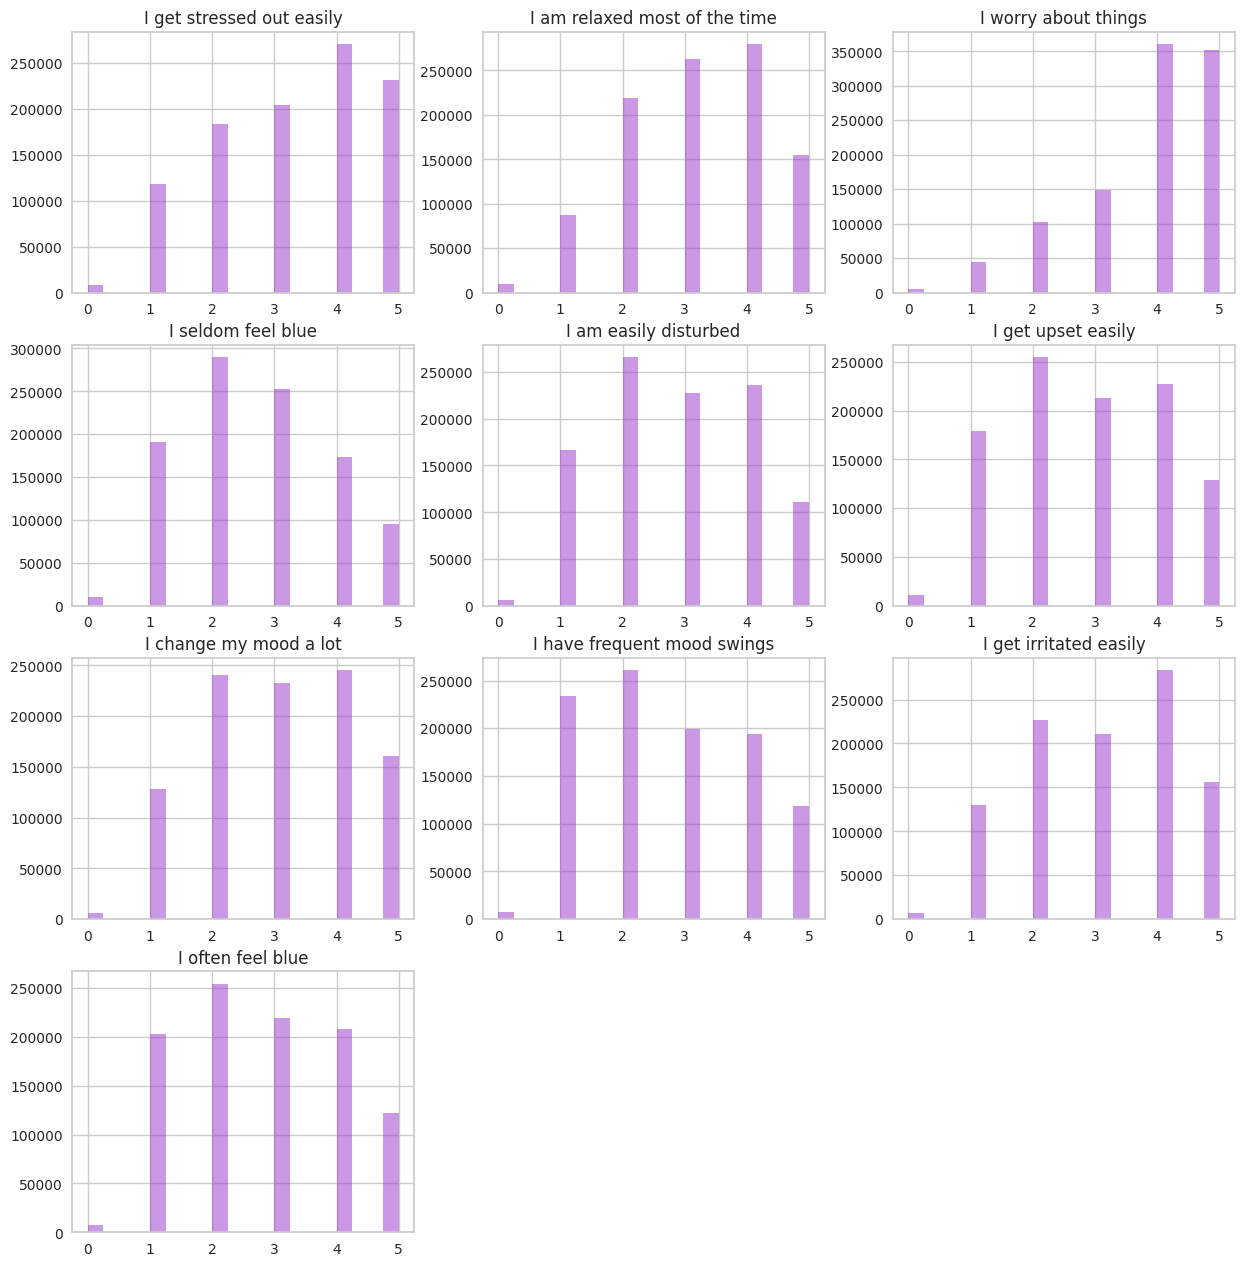

In [10]:
plot_hist(EST,est_questions,'darkorchid')

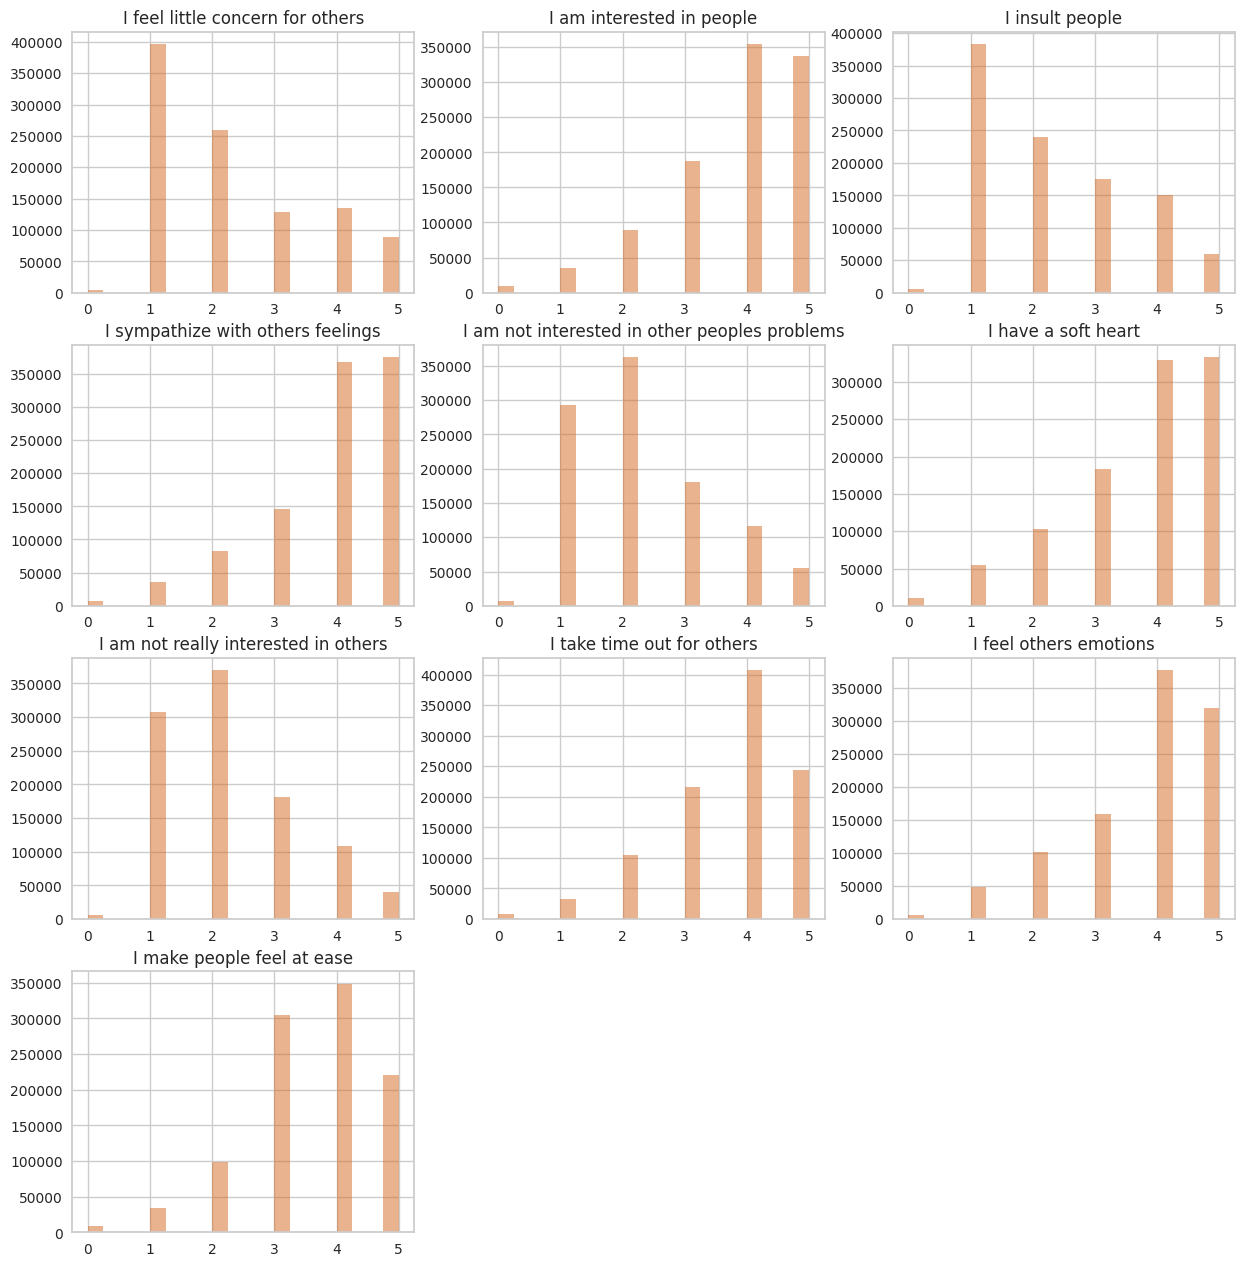

In [11]:
plot_hist(AGR,agr_questions,'chocolate')

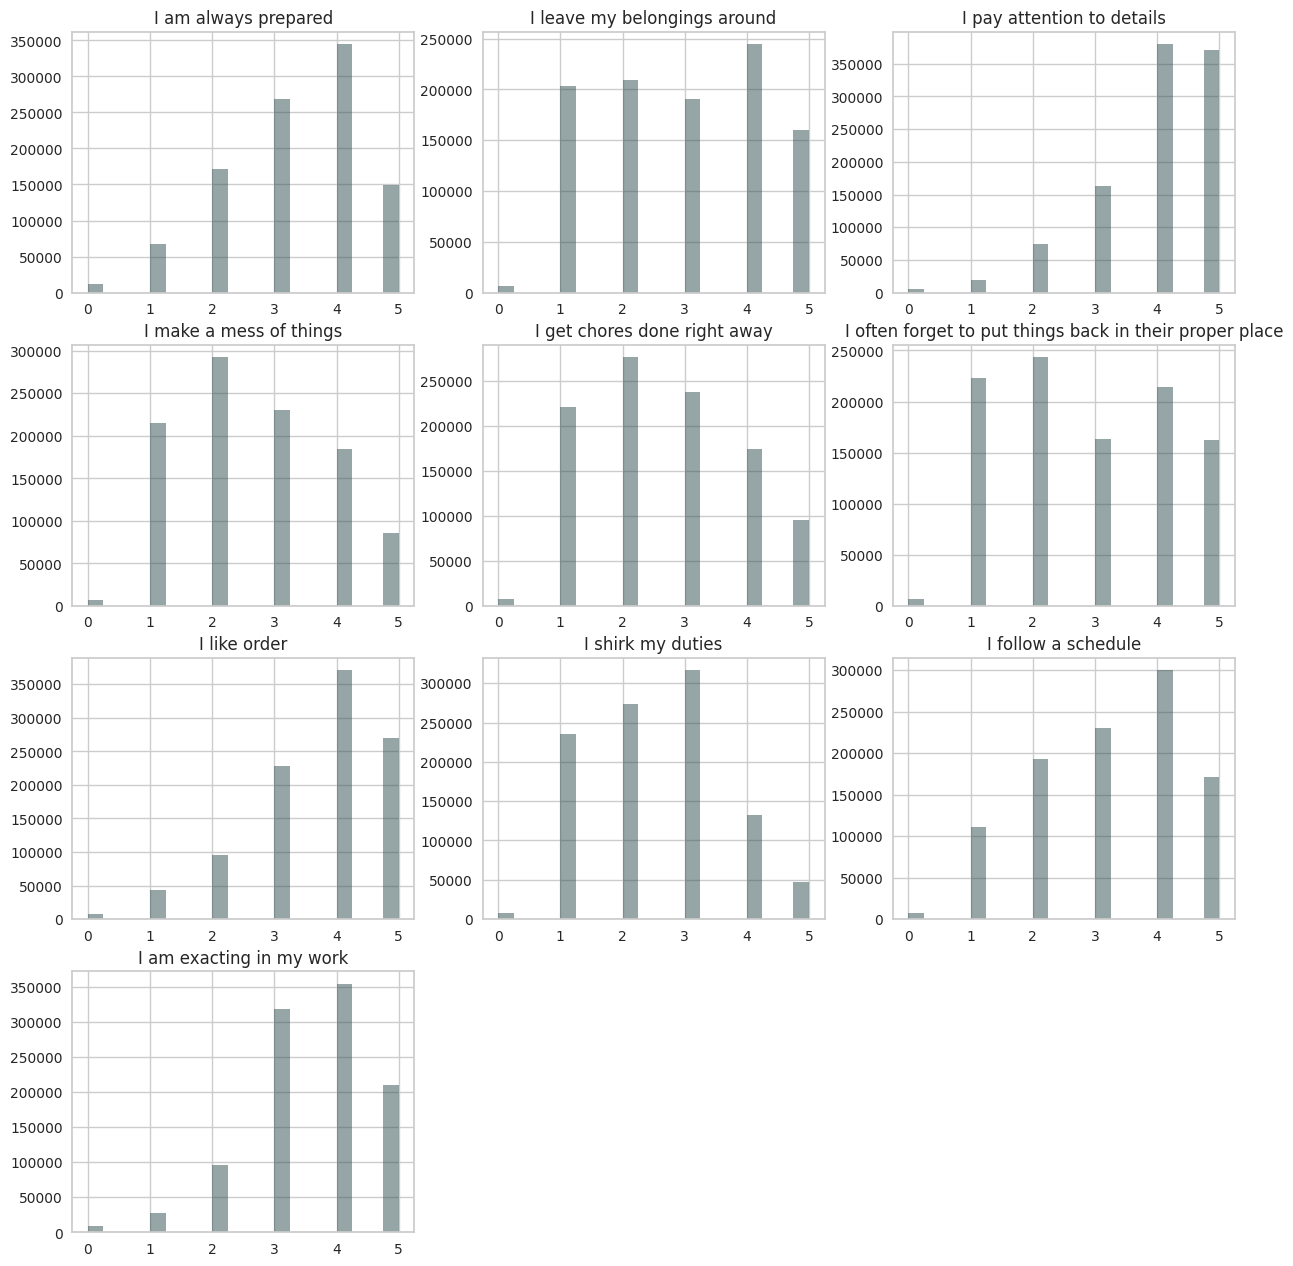

In [12]:
plot_hist(CSN,csn_questions,'darkslategrey')

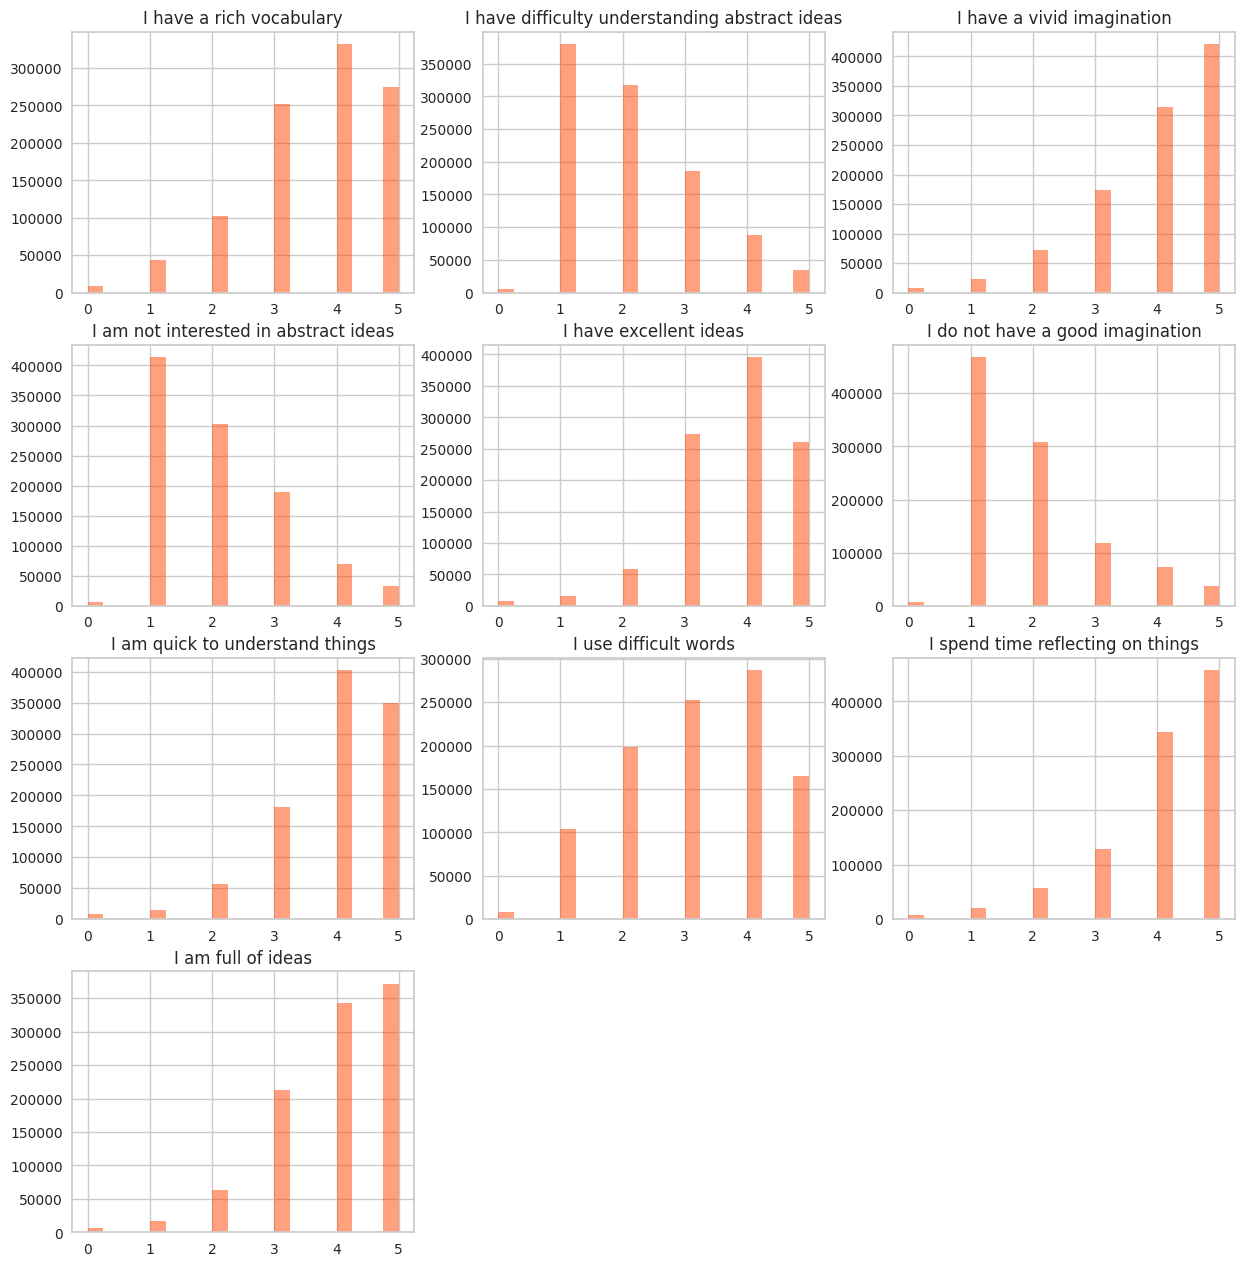

In [13]:
plot_hist(OPN,opn_questions,'orangered')

## Agora, vamos deixar os dados em uma mesma escala.

In [14]:
data.drop(data.columns[50:],axis=1,inplace=True)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [15]:
columns = data.columns
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)
df_scaled = pd.DataFrame(data_scaled, columns=columns)
df_scaled.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,...,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,...,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,...,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,...,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,...,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0


In [16]:
# Pegamos um sample de 10000 respostas ao teste

df = df_scaled[:10000]
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,...,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,...,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,...,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,...,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,...,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.8,0.6,0.8,...,0.8,0.2,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.8
9996,0.2,0.2,0.6,0.8,0.4,0.8,0.2,0.8,0.2,0.8,...,1.0,0.2,1.0,0.4,0.8,0.2,1.0,0.8,0.8,0.8
9997,0.8,0.2,1.0,0.6,1.0,0.2,0.8,0.4,0.8,0.6,...,0.2,0.2,1.0,0.2,0.6,0.6,0.4,0.4,0.8,0.6
9998,0.2,0.4,0.2,0.8,0.8,0.4,0.2,0.8,0.6,1.0,...,0.8,0.4,1.0,0.6,1.0,0.4,0.2,1.0,1.0,1.0


# Clusterização por meio do algoritmo KMeans

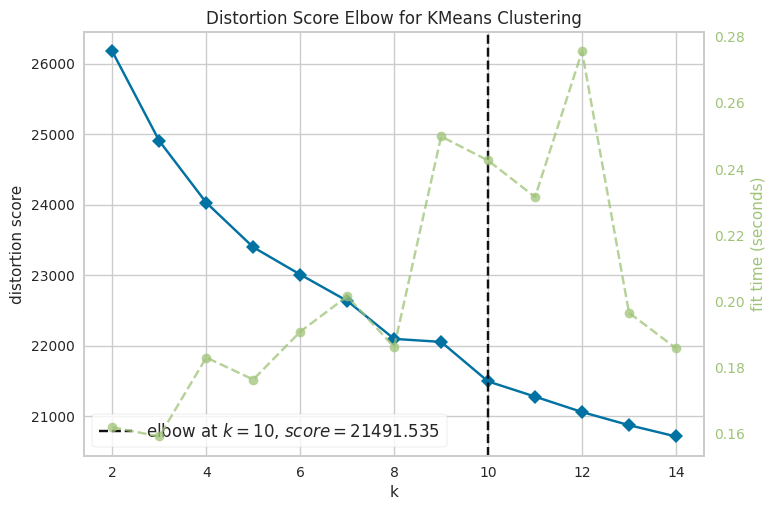

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Quantos cluster são necessários?
kmeans = KMeans(n_init='auto')
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df)
visualizer.poof()

## Vimos que 5 clusters são necessários. Vamos rodar o algoritmo com a divisão em 5 clusters.

In [18]:
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(df)

KMeans(n_clusters=5, n_init='auto')

In [19]:
# Dividindo em clusters e salvando no dataset

df['Cluster'] = kmeans.labels_
df.head()

/tmp/ipykernel_18/4063888750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Cluster
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,...,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0,1
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,...,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6,2
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,...,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8,2
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,...,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6,4
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,...,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0,1


## Vamos rodar uma Análise de Componentes Principais e visualizar os clusters.

In [20]:
pca = PCA(n_components=2).fit(df)
pca_transf = pca.transform(df)

df_pca = pd.DataFrame(pca_transf, columns=['PC1','PC2'])
df_pca['Cluster'] = df['Cluster']
df_pca.head()

,PC1,PC2,Cluster
0,-1.149228,0.736497,1
1,0.248862,0.265438,2
2,0.174082,0.326692,2
3,2.067207,0.063691,4
4,-0.952856,0.956451,1


<Axes: xlabel='PC1', ylabel='PC2'>

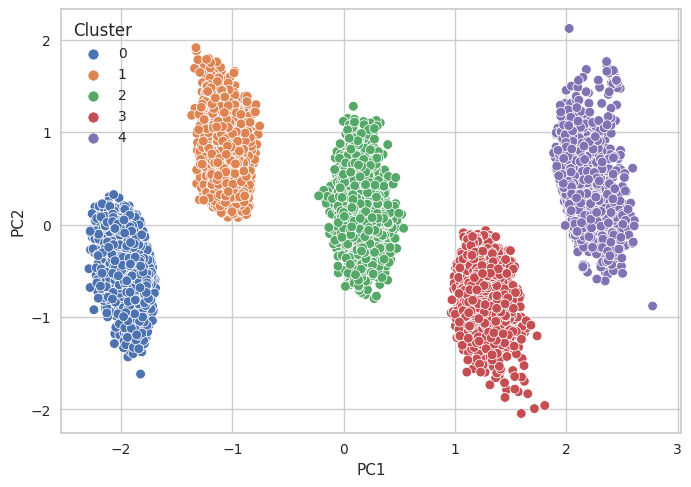

In [21]:
plt.figure()
sns.scatterplot(df_pca, x='PC1', y='PC2', hue='Cluster', palette='deep')

# Vamos visualizar, para cada Cluster, as médias das respostas.

In [22]:
df.groupby('Cluster').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.682873,0.392541,0.750184,0.509945,0.798435,0.388214,0.714825,0.564457,0.742818,0.627072,...,0.751473,0.443278,0.843646,0.409853,0.778545,0.363352,0.786556,0.680755,0.826243,0.823573
1,0.709904,0.368173,0.876250,0.435481,0.862885,0.325962,0.794038,0.548846,0.757981,0.492115,...,0.764615,0.368173,0.813365,0.375865,0.820288,0.329327,0.849135,0.637788,0.804615,0.853750
2,0.435294,0.647906,0.650729,0.719718,0.611388,0.530259,0.471435,0.795388,0.473694,0.815341,...,0.690447,0.446871,0.765553,0.429459,0.734588,0.403576,0.790306,0.559624,0.833318,0.743059
3,0.350501,0.751503,0.452305,0.828557,0.454108,0.665130,0.338577,0.826052,0.432665,0.905411,...,0.693086,0.486573,0.802004,0.447194,0.679058,0.427455,0.727455,0.622946,0.845090,0.727255
4,0.465274,0.638230,0.580578,0.666380,0.536570,0.564474,0.455194,0.689613,0.547880,0.748248,...,0.684696,0.433190,0.704978,0.456300,0.696005,0.437738,0.760541,0.592502,0.709035,0.705224


In [23]:
column_list = list(df)
ext = column_list[0:10]
est = column_list[10:20]
agr = column_list[20:30]
csn = column_list[30:40]
opn = column_list[40:50]

sums = pd.DataFrame()
sums['Extroversion'] = df[ext].sum(axis=1)/10
sums['Neurotic'] = df[est].sum(axis=1)/10
sums['Agreeable'] = df[agr].sum(axis=1)/10
sums['Conscientious'] = df[csn].sum(axis=1)/10
sums['Open'] = df[opn].sum(axis=1)/10
sums['Cluster'] = df['Cluster']

sums.head()

,Extroversion,Neurotic,Agreeable,Conscientious,Open,Cluster
0,0.60,0.48,0.62,0.64,0.66,1
1,0.68,0.42,0.64,0.62,0.54,2
2,0.58,0.52,0.56,0.56,0.62,2
3,0.52,0.54,0.64,0.54,0.62,4
4,0.70,0.46,0.60,0.64,0.72,1


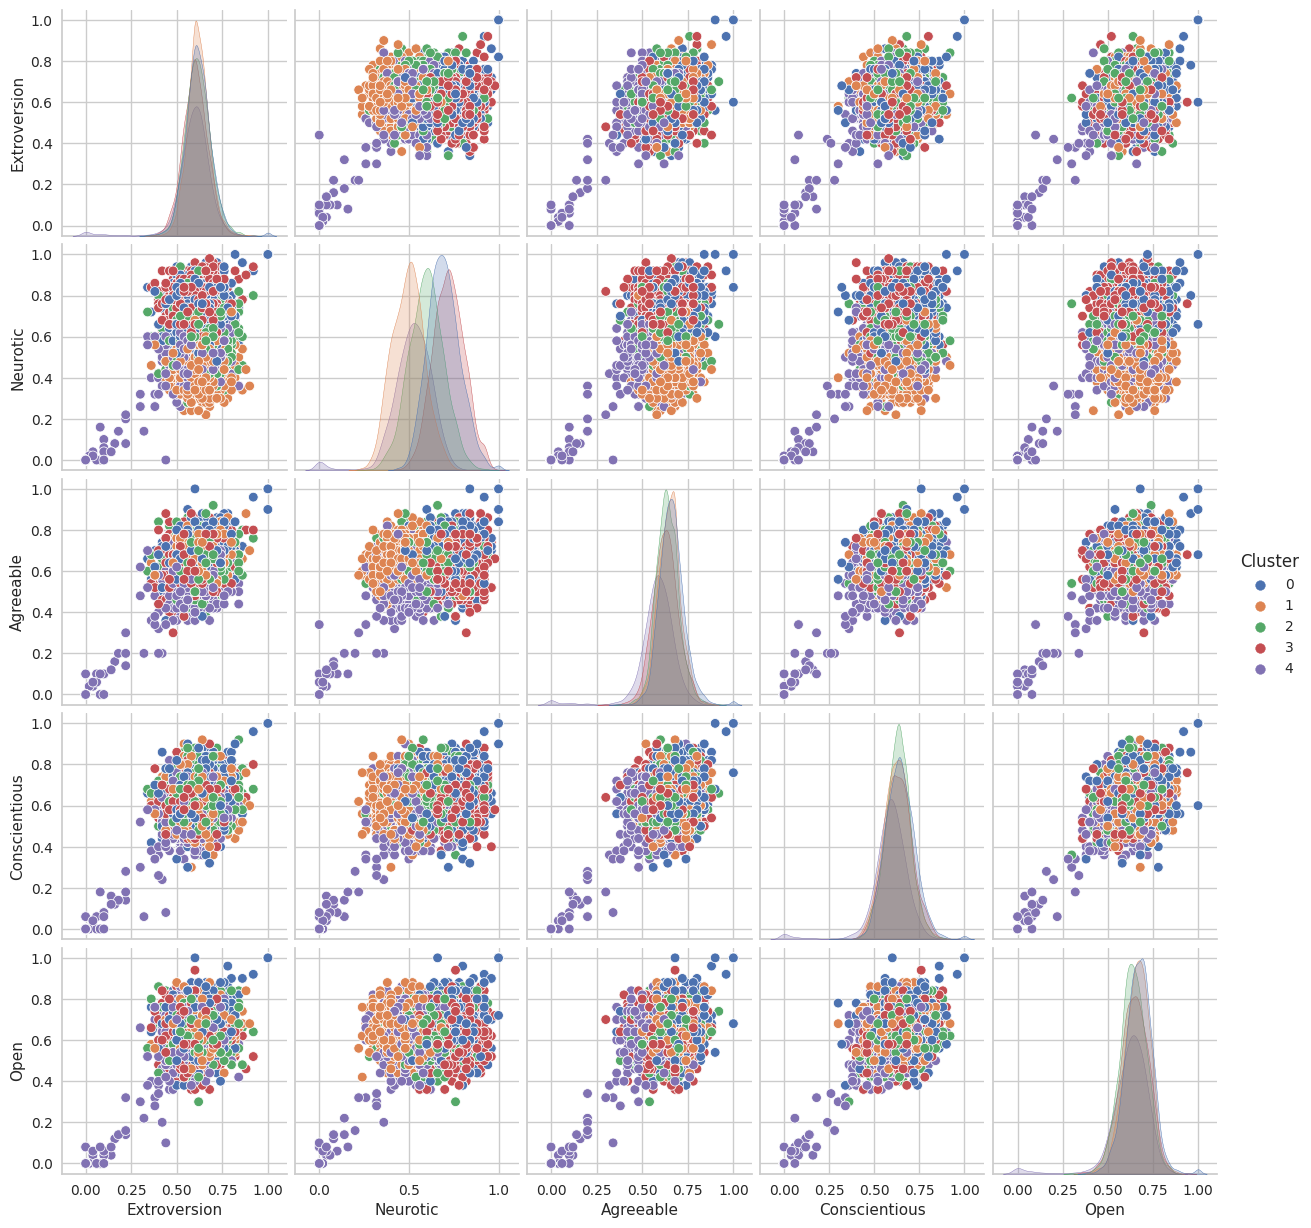

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(sums,hue='Cluster', palette='deep')
plt.show()

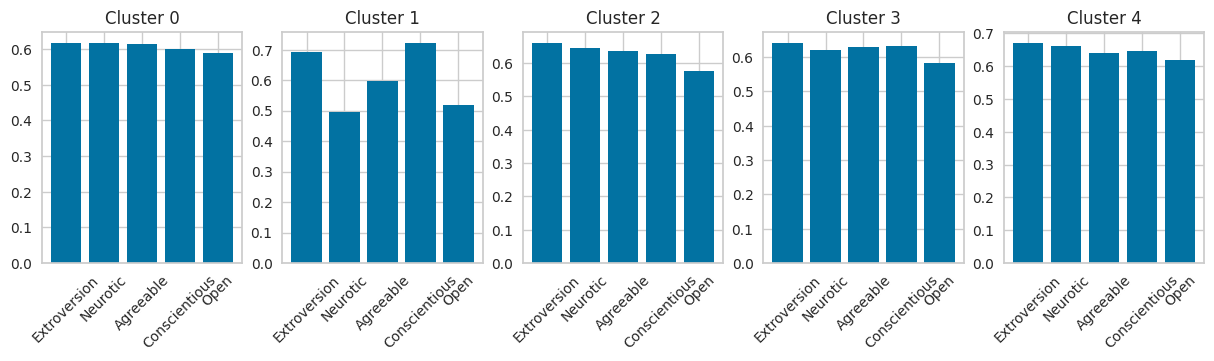

In [25]:
clusters_mean = sums.groupby('Cluster').mean()
plt.figure(figsize=(15,3))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.bar(clusters_mean.columns, clusters_mean.iloc[:,i])
    plt.title('Cluster '+str(i))
    plt.xticks(rotation=45)

## Fazendo o meu teste de personalidade.

In [26]:
my_test = pd.read_csv('/kaggle/input/mytest/my_test.csv')
my_test = my_test.astype(float)

In [27]:
my_test

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,0.0,5.0,1.0,5.0,1.0,4.0,2.0,4.0,0.0,...,5.0,0.0,2.0,0.0,3.0,1.0,4.0,4.0,5.0,4.0


In [28]:
# Vamos juntar o meu teste aos outros testes sem aplicação do scaler

my_test_data = pd.concat([my_test,data])
my_test_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,0.0,5.0,1.0,5.0,1.0,4.0,2.0,4.0,0.0,...,5.0,0.0,2.0,0.0,3.0,1.0,4.0,4.0,5.0,4.0
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0


In [29]:
# Vamos aplicar o Scaler novamente

columns = data.columns
scaler = MinMaxScaler(feature_range=(0,1))
mytest_scaled = scaler.fit_transform(my_test_data)
my_test_scaled = pd.DataFrame(mytest_scaled, columns=columns)
my_test_scaled.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.0,1.0,0.2,1.0,0.2,0.8,0.4,0.8,0.0,...,1.0,0.0,0.4,0.0,0.6,0.2,0.8,0.8,1.0,0.8
1,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,...,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
2,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,...,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
3,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,...,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
4,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,...,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6


In [30]:
# Vamos pegar apenas a primeira linha, que corresponde ao meu teste

my_test = my_test_scaled.iloc[0:1]
my_test

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.0,1.0,0.2,1.0,0.2,0.8,0.4,0.8,0.0,...,1.0,0.0,0.4,0.0,0.6,0.2,0.8,0.8,1.0,0.8


In [31]:
my_personality = kmeans.predict(my_test)
print('Meu Cluster: ', my_personality)

Meu Cluster:  [1]


In [32]:
col_list = list(my_test)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['Extroversion'] = my_test[ext].sum(axis=1)/10
my_sums['Neurotic'] = my_test[est].sum(axis=1)/10
my_sums['Agreeable'] = my_test[agr].sum(axis=1)/10
my_sums['Conscientious'] = my_test[csn].sum(axis=1)/10
my_sums['Open'] = my_test[opn].sum(axis=1)/10
my_sums['Cluster'] = my_personality

my_sums.head()

,Extroversion,Neurotic,Agreeable,Conscientious,Open,Cluster
0,0.52,0.36,0.54,0.7,0.56,1


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Extroversion'),
  Text(1, 0, 'Neurotic'),
  Text(2, 0, 'Agreeable'),
  Text(3, 0, 'Conscientious'),
  Text(4, 0, 'Open')])

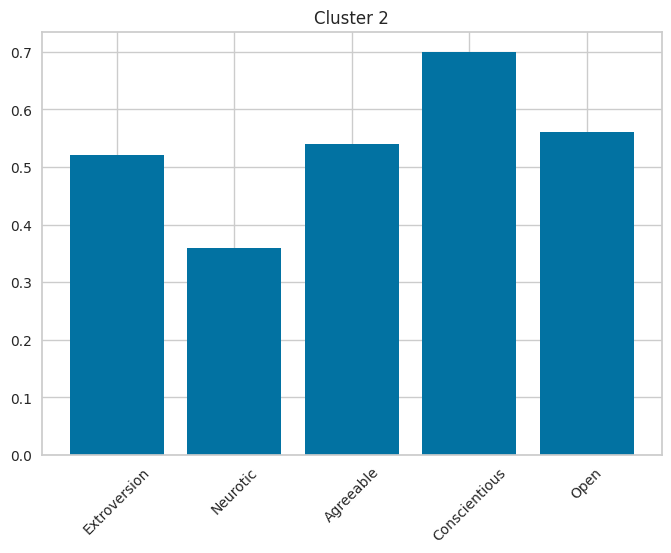

In [33]:
my_sum = my_sums.drop('Cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:])
plt.title('Cluster 2')
plt.xticks(rotation=45)

## Meu teste bateu com o Cluster 2 nas categorias: Extroversion, Agreeable e Open. Nos casos de Neurotic e Conscientious, ficaram um pouco abaixo da média do Cluster.